In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [108]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [109]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [110]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [111]:
df.shape

(3755, 11)

In [112]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [113]:
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full-time', 'CT':'Contractual','PT':'Part-time', 'FL':'Freelancer'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'On-site', 0:'Remote', 50:'Hybrid'})
df['company_size'] = df['company_size'].replace({'L': 'Large', 'M':'Medium', 'S':'Small'})

In [114]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,On-site,ES,Large
1,2023,Mid-level,Contractual,ML Engineer,30000,USD,30000,US,On-site,US,Small
2,2023,Mid-level,Contractual,ML Engineer,25500,USD,25500,US,On-site,US,Small
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,On-site,CA,Medium
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,On-site,CA,Medium


In [115]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(1171, 11)

In [116]:
df = df.drop_duplicates(keep='last')

In [117]:
df = df.drop(['salary_currency', 'salary'], axis=1)

In [118]:
df.shape

(2584, 9)

In [121]:
top_salary =  df.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).head(10)
top_salary.head(10)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
Director of Data Science,195140.73
Principal Data Engineer,192500.00
Machine Learning Software Engineer,192420.00
Applied Scientist,190342.58


In [91]:
bottom_salary =  df.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).tail(10)
bottom_salary.tail(10)

,salary_in_usd
job_title,
Data DevOps Engineer,53654.00
Insight Analyst,46786.00
Machine Learning Research Engineer,42819.25
Principal Data Architect,38154.00
Compliance Data Analyst,30000.00
Autonomous Vehicle Technician,26277.50
3D Computer Vision Researcher,21352.25
Staff Data Analyst,15000.00
Product Data Scientist,8000.00


In [92]:
top_10_jobs=df['job_title'].value_counts().nlargest(10)
print(top_10_jobs)

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
Research Scientist            65
Data Architect                64
Data Science Manager          52
ML Engineer                   34
Research Engineer             33
Name: job_title, dtype: int64


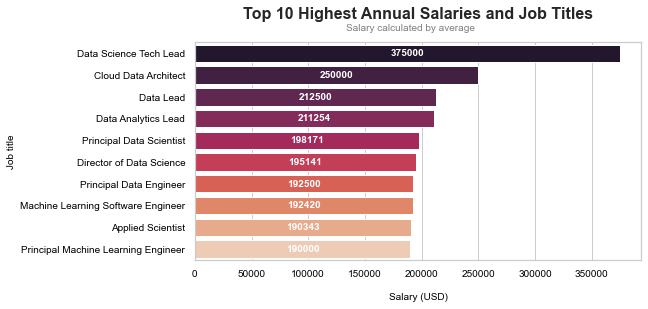

In [58]:
plt.figure(figsize=(8,4))

sns.set(style="whitegrid")
ax= sns.barplot(y = top_salary.index, x ='salary_in_usd', 
            data = top_salary,           
            palette = "rocket",
            )
            
plt.title('Top 10 Highest Annual Salaries and Job Titles\n', fontsize=16, fontweight="bold", loc="center")
plt.suptitle("\nSalary calculated by average\n", fontsize = 10, color="gray")
plt.xlabel('\nSalary (USD)', color="black", fontsize=10)
plt.ylabel('Job title', color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

for i in ax.containers:
    ax.bar_label(i, size=10, label_type = "center", color="white", fontweight="bold")

plt.show()

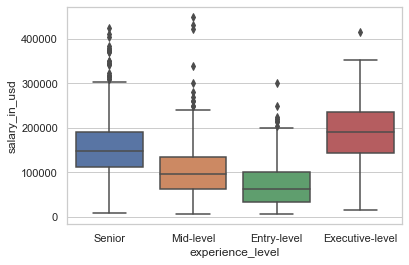

In [59]:
sns.boxplot(x='experience_level',y='salary_in_usd',data=df, )
plt.show()

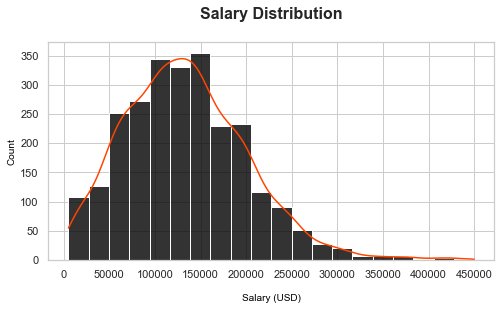

In [60]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))

ax = sns.histplot(df['salary_in_usd'], alpha=0.8, color = "black", bins=20,
             kde = True)

plt.xticks(range(0,500000,50000));
plt.title("Salary Distribution\n", fontsize=16, fontweight = "bold")
plt.xlabel('\nSalary (USD)', color="black",fontsize=10)
plt.ylabel('Count', color = "black", fontsize=10)
ax.lines[0].set_color('orangered')

In [61]:
job_type = df.groupby('employment_type').agg({'salary_in_usd':'mean'}).round(0).sort_values('salary_in_usd', ascending=False)

job_type

,salary_in_usd
employment_type,
Full-time,134435.0
Contractual,113447.0
Freelancer,51808.0
Part-time,39534.0


In [65]:
fig = px.scatter(job_type, x="salary_in_usd", y=None,
                 size="salary_in_usd", color=job_type.index,
                 size_max=60)

fig.update_layout(yaxis=dict(title=''), xaxis=dict(title='\nAvg. Annual Salary'), title={'text':'Job Type and Average Salary', 'font':{'size':20}})
fig.update_xaxes(range=[5000, 150000], dtick=10000)
fig.update_layout(width=900, height=500)

fig.show()

In [102]:
df_remote = df.groupby('remote_ratio').agg({'salary_in_usd':'mean'}).round(0).sort_values('salary_in_usd', ascending=False)

df_remote

,salary_in_usd
remote_ratio,
Remote,143690.0
On-site,131822.0
Hybrid,78487.0
